In [1]:
import phoebe
from phoebe import u,c
import matplotlib.cm as cm
logger = phoebe.logger(clevel='WARNING')

Phoebe is capable of building all kinds of heirarchies, but the simplest way to begin is by loading the default binary and then changing its parameters as we wish

In [2]:
b = phoebe.default_binary()

This object is known as a 'bundle' and contains all the parameters of the system as well as some callable methods.

In [3]:
b

<PHOEBE Bundle: 141 parameters | contexts: component, system, constraint, setting, figure, compute>

Let's investigate parameters related to compute contained in the bundle

In [4]:
print(b['compute'])

ParameterSet: 17 parameters
     sample_from@phoebe01@compute: []
        comments@phoebe01@compute: 
      use_server@phoebe01@compute: none
   dynamics_method@phoebe01@co...: keplerian
            ltte@phoebe01@compute: False
    irrad_method@phoebe01@compute: horvat
   boosting_method@phoebe01@co...: none
   eclipse_method@phoebe01@com...: native
   horizon_method@phoebe01@com...: boolean
   mesh_method@primary@phoebe0...: marching
   mesh_method@secondary@phoeb...: marching
   ntriangles@primary@phoebe01...: 1500
   ntriangles@secondary@phoebe...: 1500
   distortion_method@primary@p...: roche
   distortion_method@secondary...: roche
     atm@primary@phoebe01@compute: ck2004
   atm@secondary@phoebe01@compute: ck2004


Can access these parameters through twigs (minimum string required to define a particular parameter) or filters

In [5]:
b.filter(context='compute', component='primary', qualifier='ntriangles').get_parameter()

<Parameter: ntriangles=1500 | keys: description, value, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [6]:
b['ntriangles@primary@compute']

<Parameter: ntriangles=1500 | keys: description, value, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In the same way, we can set these parameters

In [7]:
b['ntriangles@primary@compute']=200000

In [8]:
b.filter(context='compute', component='primary', qualifier='ntriangles').set_value(1500)

Before we can actually run a model, we need to tell phoebe what to evaluate.  Is it a light curve? RV curve? Orbit? At what times? 
We do this by adding datasets (which can include the real data for comparison).

In [9]:
b.add_dataset('lc', times=phoebe.linspace(0, 1, 51)*u.d, dataset='lc01',passband='Johnson:V')

<ParameterSet: 80 parameters | contexts: constraint, figure, compute, dataset>

100%|██████████| 51/51 [00:01<00:00, 45.28it/s]


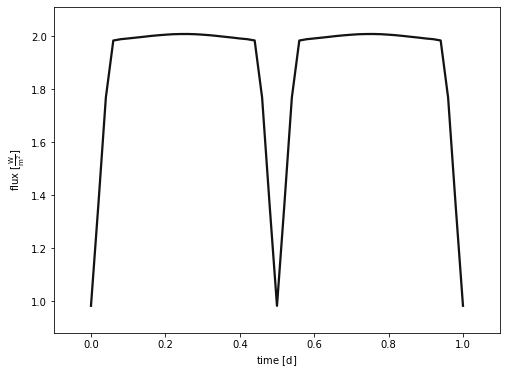

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [10]:
b.run_compute()
b.plot(show=True)

Another example: meshes

In [11]:
b.add_dataset('mesh', compute_times=[0,0.25], dataset='mesh01')

<ParameterSet: 85 parameters | contexts: constraint, figure, compute, dataset>

In [12]:
b.run_compute()

Tue, 13 Sep 2022 13:00 BUNDLE       WARNING overwriting model: latest
100%|██████████| 52/52 [00:01<00:00, 44.71it/s]


<ParameterSet: 21 parameters | kinds: lc, mesh>

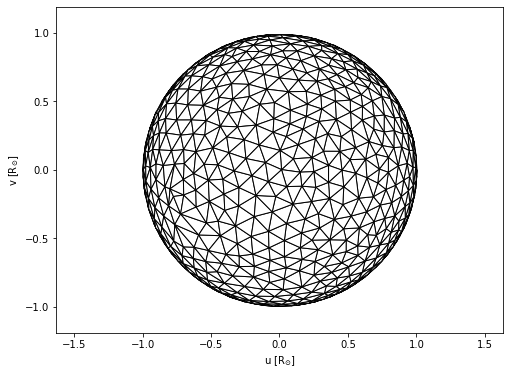

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [13]:
b['mesh01@model'].plot(time=0,show=True)

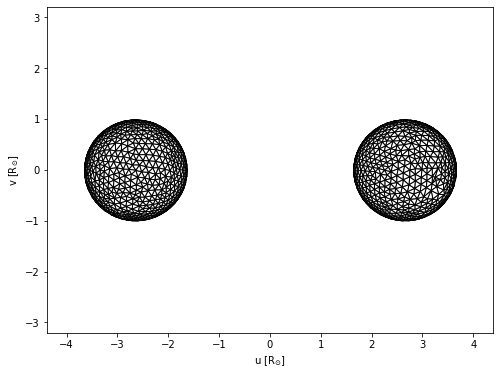

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [14]:
b['mesh01@model'].plot(time=0.25,show=True)

Meshes can even be plotted with face colours that represent temperature or intensity

Tue, 13 Sep 2022 13:01 BUNDLE       WARNING overwriting model: latest
100%|██████████| 52/52 [00:01<00:00, 47.89it/s]


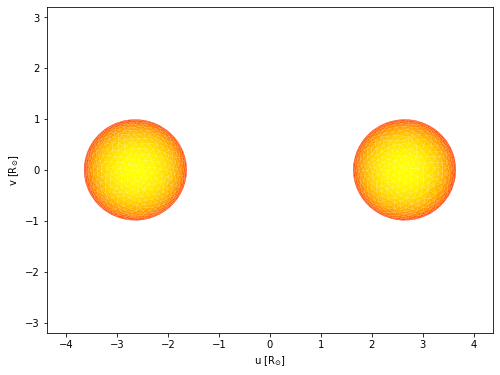

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [15]:
b.add_dataset('mesh', compute_times=[0.24], dataset='mesh02',columns=['visibilities', 'intensities@lc01'])
b.run_compute()
b['mesh02@model'].plot(fc='intensities@lc01', ec='None',fcmap=cm.autumn,show=True)